In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer

plt.style.use('ggplot')

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib
import warnings
#import xgboost as xgb
#import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df['month']=pd.to_datetime(df['month'])
df['month'].head()
df['Year'] = df['month'].apply(lambda x: x.year)
df['Month'] = df['month'].apply(lambda y: y.month)
df['years_left'] = df['Year'] - df['lease_commence_date']
df = df.drop(columns = ['month','block','lease_commence_date','Month','Year','remaining_lease'])

In [3]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,years_left
15089,YISHUN,4 ROOM,YISHUN ST 81,01 TO 03,84.0,Simplified,298000.0,29
23874,PUNGGOL,4 ROOM,PUNGGOL WALK,04 TO 06,94.0,Premium Apartment,480000.0,4
60601,BEDOK,3 ROOM,BEDOK STH AVE 1,07 TO 09,59.0,Improved,275000.0,43
17448,CHOA CHU KANG,4 ROOM,CHOA CHU KANG ST 54,01 TO 03,105.0,Model A,336000.0,21
57584,SEMBAWANG,4 ROOM,MONTREAL LINK,04 TO 06,93.0,Model A,360000.0,4


In [4]:
# Check the columns using dtypes
print(df.dtypes)

town               object
flat_type          object
street_name        object
storey_range       object
floor_area_sqm    float64
flat_model         object
resale_price      float64
years_left          int64
dtype: object


# 2. Baseline Model (Decision Tree)
A simple/initial model that you compare your later/more complex models against. It is basically the benchmark for your problem statement.

#### Label Encoder for ordinal data columns

In [5]:
#technically town, flat_type, streets_name and flat_model have a "tier" of sort, some town are better areas to live,
#some flat_type are better,
for column in df.columns:
    if (df[column].dtype == type(object)) and (column != 'flat_type'):
        #Create the label encoder
        le = preprocessing.LabelEncoder()
        #Convert the non numeric data to numeric
        df[column] = le.fit_transform(df[column])

In [6]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,years_left
6235,2,5 ROOM,51,5,131.0,4,775000.0,29
65597,20,5 ROOM,144,1,110.0,4,425000.0,19
45432,8,5 ROOM,115,3,124.0,12,380000.0,19
29850,22,5 ROOM,438,2,123.0,4,570000.0,21
7951,25,4 ROOM,526,1,103.0,7,380000.0,31


#### One Hot Encoder for nominal data columns

In [7]:
# #OneHotEncoder categorical nominal data column "town","flat_type","street_name","flat_model","Day of Week"
# cols = ["town","street_name","flat_model"]
# for i in cols:
#     labelbinarizer = LabelBinarizer()
#     x = labelbinarizer.fit_transform(df[i])
#     encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
#     df = pd.concat([df, encoded_df], axis=1)

### Building Decision Tree Model

In [8]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [9]:
#split dataset in features and target variable
feature_cols = ['town','street_name','storey_range','floor_area_sqm','flat_model','years_left','resale_price']
X = df[feature_cols]
#y = df[['flat_type']]
y = df['flat_type']

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [11]:
# initialise Decision Tree
#Using gini currently, can also use entropy or miclassification error.
clf = DecisionTreeClassifier(criterion='gini',random_state=0) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(100)

,Actual,Predicted
44597,4 ROOM,4 ROOM
6292,4 ROOM,4 ROOM
38655,3 ROOM,3 ROOM
33404,3 ROOM,3 ROOM
35601,4 ROOM,4 ROOM
...,...,...
10011,5 ROOM,5 ROOM
31078,4 ROOM,4 ROOM
24614,4 ROOM,4 ROOM
51689,3 ROOM,3 ROOM


In [13]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9983438224577674


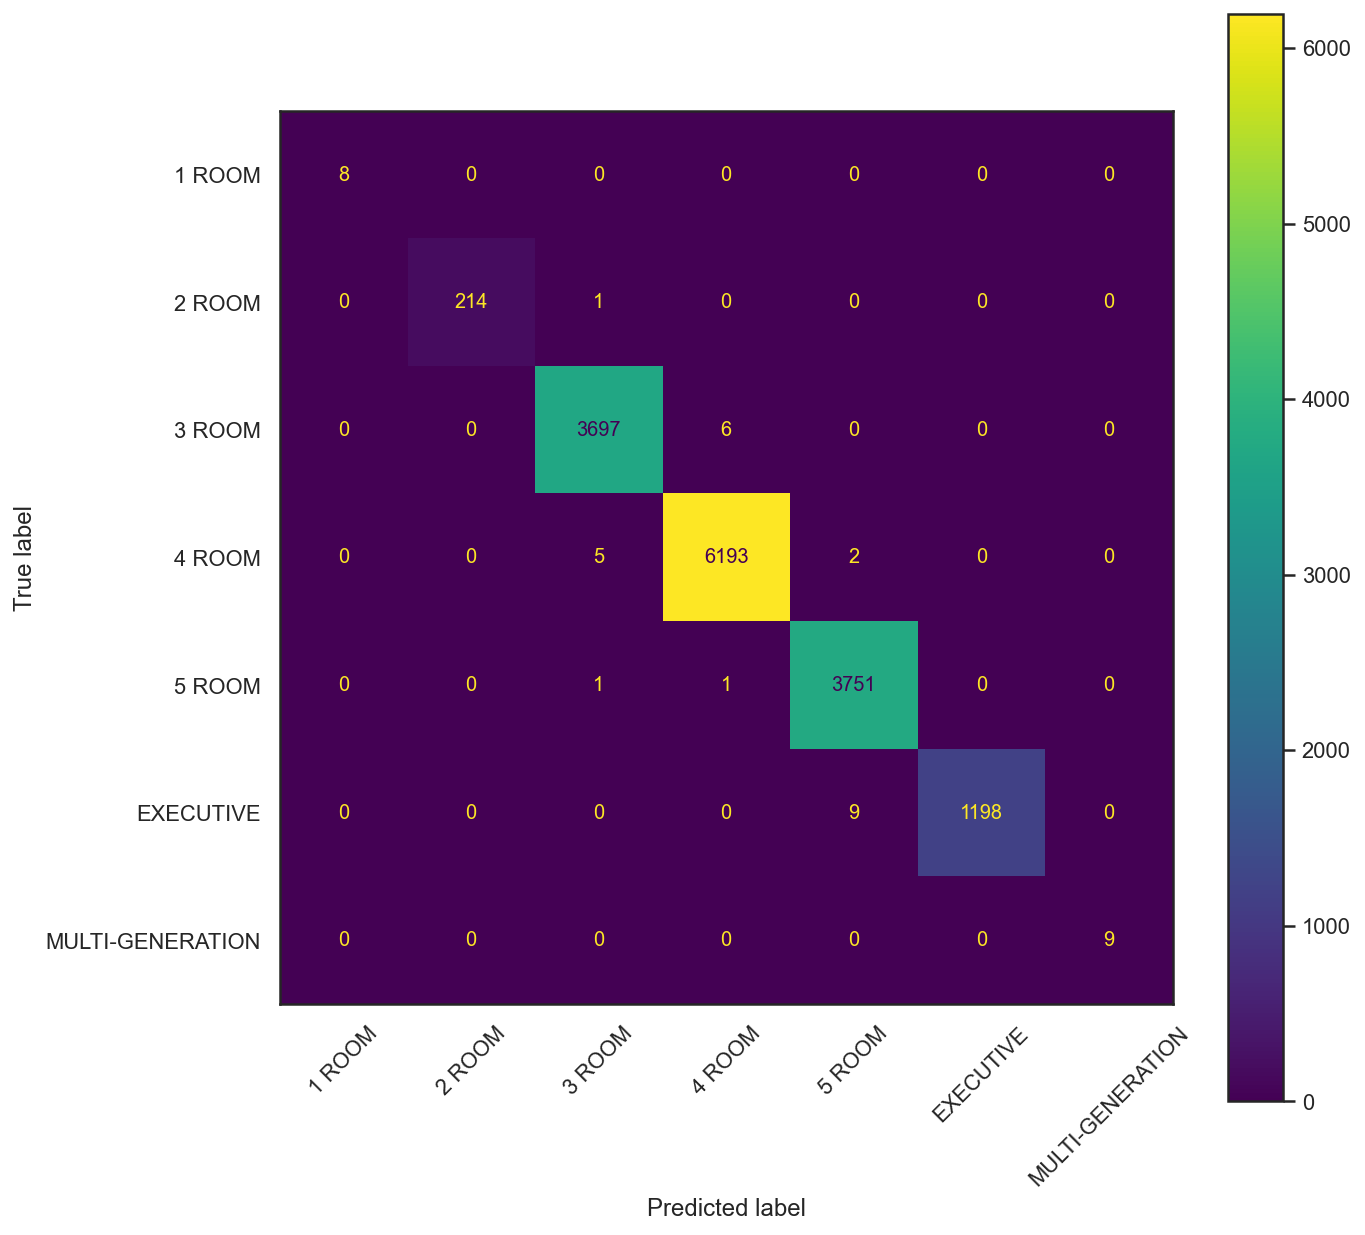

In [14]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [15]:
# Precision = (True Positive)/(Total Predicted Positive)
# To determine if costs of False Positive is high.
precision = metrics.precision_score(y_test, predictions, average='micro')
precision1 = metrics.precision_score(y_test, predictions, average='macro')
precision2 = metrics.precision_score(y_test, predictions, average='weighted')

#Recall = (True Positive)/(Total Actual Positive)
# calculates the no. of Actual Positives our model capture through labeling it as Positive
recall = metrics.recall_score(y_test, predictions, average='micro')
recall1 = metrics.recall_score(y_test, predictions, average='macro')
recall2 = metrics.recall_score(y_test, predictions, average='weighted')

#F1-score = 2* (precision*recall)/(precision + recall)
# F1 Score is needed when you want to seek a balance between Precision and Recall.
f_measure = metrics.f1_score(y_test, predictions, average='micro')
f_measure1 = metrics.f1_score(y_test, predictions, average='macro')
f_measure2 = metrics.f1_score(y_test, predictions, average='weighted')

# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
print("Precision_micro:",precision)
print("Recall_micro:",recall)
print("F-measure_micro:",f_measure)

print("Precision1_macro:",precision1)
print("Recall1_macro:",recall1)
print("F-measure1_macro:",f_measure1)

print("Precision2_weighted:",precision2)
print("Recall2_weighted:",recall2)
print("F-measure2_weighted:",f_measure2)

Precision_micro: 0.9983438224577674
Recall_micro: 0.9983438224577674
F-measure_micro: 0.9983438224577674
Precision1_macro: 0.9991510203316648
Recall1_macro: 0.9978014409081093
F-measure1_macro: 0.9984732559360371
Precision2_weighted: 0.9983456909995552
Recall2_weighted: 0.9983438224577674
F-measure2_weighted: 0.9983432034820403


In [16]:
###################################################################################################################################


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


In [18]:
#Create the kNN classifier and set the number of neighbors to be 3. Note that you can tune this number of neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the training feature Xs and training label Ys
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = model.predict(X_test)

In [20]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out different scores.
f2 = precision_score(y_pred, y_test,average='micro')
f3 = recall_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[    7     7     9     0     0     0     0]
 [    1   281    95     4     1     0     0]
 [    3   306  7873   617    67    20     0]
 [    0    10  1062 13420  1542   258     4]
 [    0     0    68  1490  7245   825     7]
 [    0     0     8    97   482  1921     7]
 [    0     0     0     0     0     0     0]]
accuracy:  0.8147706494951904
f1-Score:  0.8147706494951904
precision:  0.8147706494951904
recall:  0.8147706494951904


## Bagging (with Decision Tree)

Refer to the following links on for detail explanation on the implementation:

In [21]:
#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50)

In [22]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)

In [23]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   11     0     0     0     0     0     0]
 [    0   599     3     0     0     0     0]
 [    0     5  9088    14     0     0     0]
 [    0     0    22 15611     2     0     0]
 [    0     0     2     3  9327     9     0]
 [    0     0     0     0     8  3015     0]
 [    0     0     0     0     0     0    18]]
Accuracy:  0.9981980549593238
F1-Score_micro:  0.9981980549593238
precision_micro:  0.9981980549593238
recall_micro:  0.9981980549593238
F1-Score_maro:  0.9979191971176433
precision_macro:  0.997660673509184
recall_macro:  0.9981785914045557
F1-Score_weighted:  0.9981983458377764
precision_weighted:  0.9981988852085485
recall_weighted:  0.9981980549593238


In [24]:
# get predictions and compare results
predictions = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
34636,5 ROOM,5 ROOM
33483,EXECUTIVE,EXECUTIVE
39233,4 ROOM,4 ROOM
47897,4 ROOM,4 ROOM
4178,3 ROOM,3 ROOM
31047,4 ROOM,4 ROOM
32289,5 ROOM,5 ROOM
28790,5 ROOM,5 ROOM
64385,4 ROOM,4 ROOM
48301,4 ROOM,4 ROOM


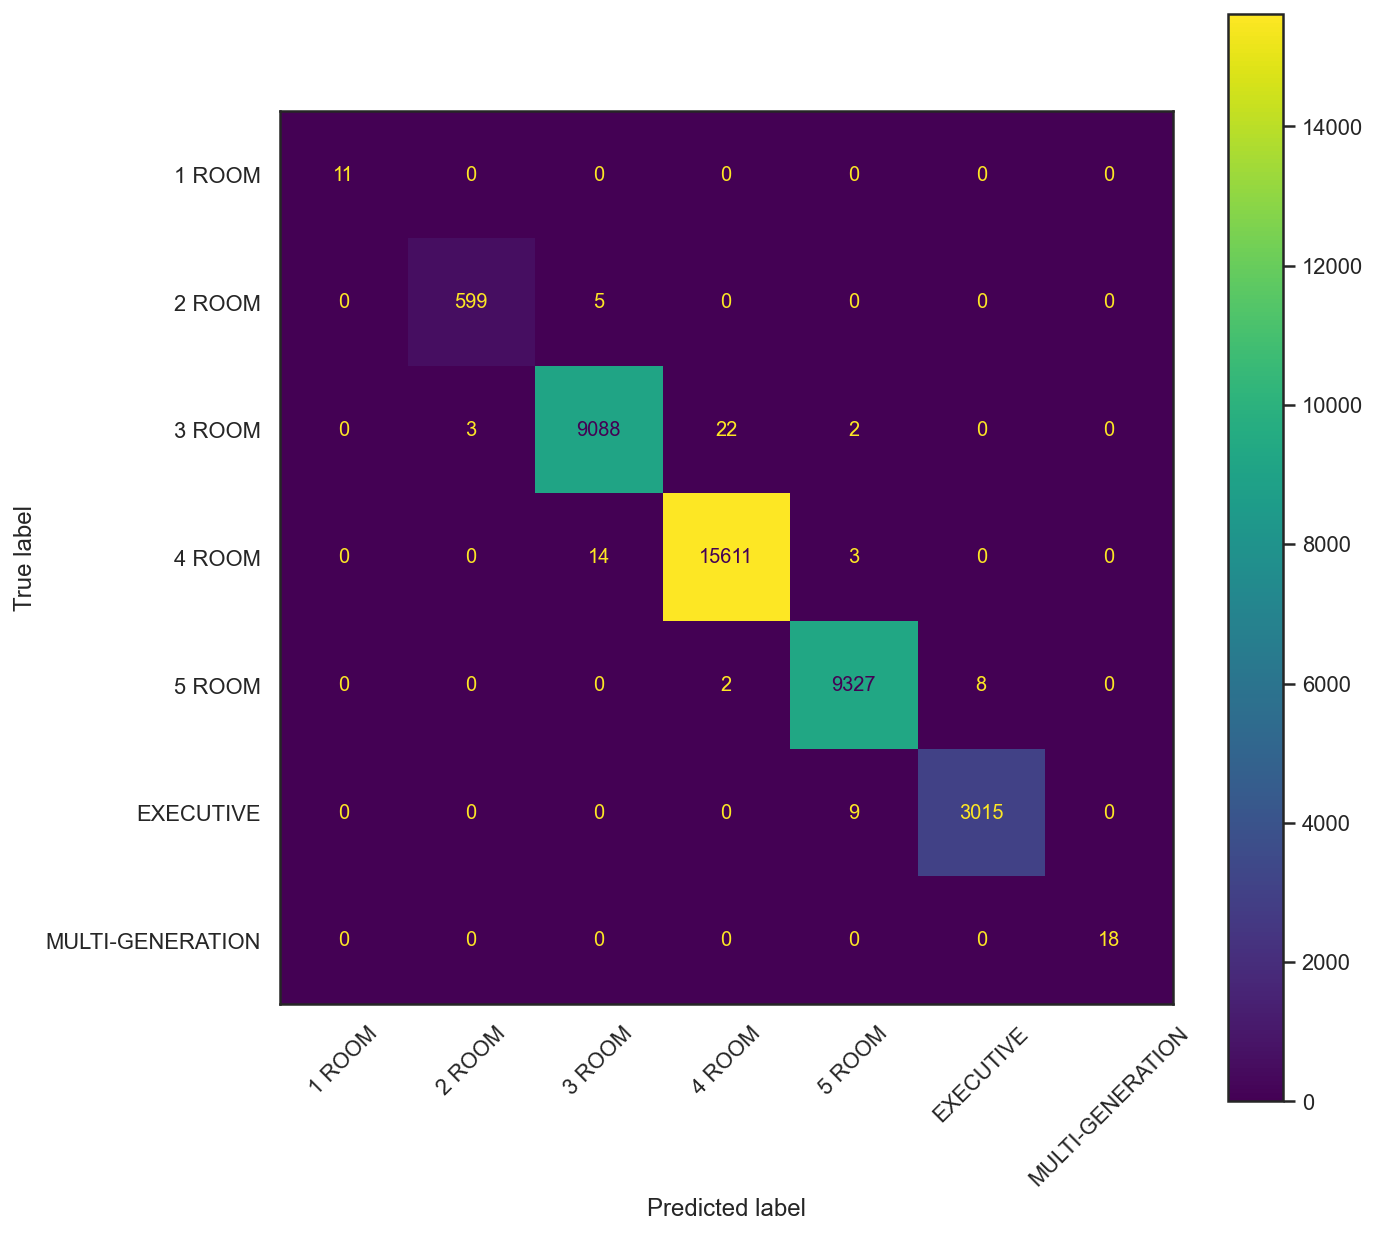

In [25]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation = 45);

## Bagging (with kNN)

In [26]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [27]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,pos_label='positive',average='micro')
f3 = recall_score(y_pred, y_test,pos_label='positive',average='micro')
#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   11     0     0     0     0     0     0]
 [    0   599     3     0     0     0     0]
 [    0     5  9088    14     0     0     0]
 [    0     0    22 15611     2     0     0]
 [    0     0     2     3  9327     9     0]
 [    0     0     0     0     8  3015     0]
 [    0     0     0     0     0     0    18]]
accuracy:  0.9981980549593238
f1-Score:  0.9981980549593238
precision:  0.9981980549593238
recall:  0.9981980549593238


## AdaBoost (with Decision Tree)


In [28]:
#Create the AdaBoost classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
modelA = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

#Fit the training feature Xs and training label Ys
modelA.fit(X_train, y_train)

#Use the trained modelA to predict the test data
y_pred = modelA.predict(X_test)

In [29]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [   11   602   874    17     0     0     0]
 [    0     2  8234 15294   120     0     0]
 [    0     0     7   317  9217  3024    18]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]]
Accuracy:  0.6726819831995124
F1-Score_micro:  0.6726819831995124
precision_micro:  0.6726819831995124
recall_micro:  0.6726819831995124
F1-Score_maro:  0.2549049018217782
precision_macro:  0.2945231302775158
recall_macro:  0.2800420010630752
F1-Score_weighted:  0.7750233612394557
precision_weighted:  0.9462874406051085
recall_weighted:  0.6726819831995124


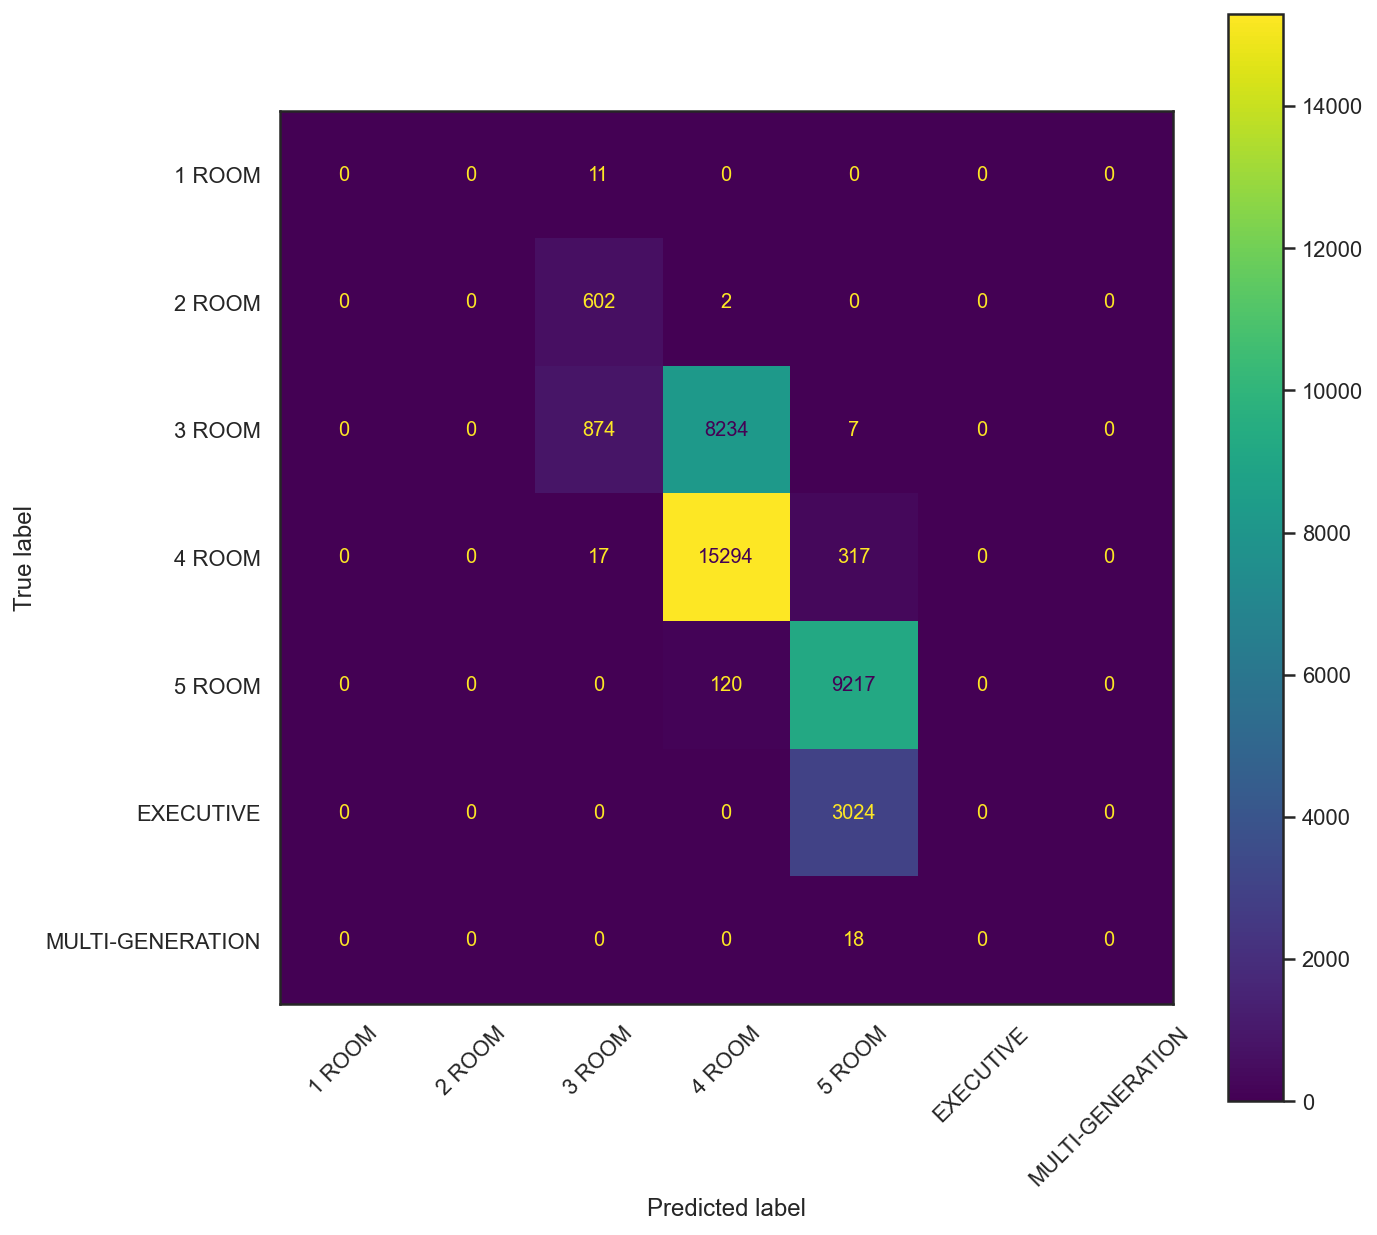

In [30]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(modelA, X_test, y_test, ax=ax, xticks_rotation = 45);

## AdaBoost (with Gaussian Navie Bayes)
Refer to the following links on for detail explanation on the implementation:

In [31]:
model = GaussianNB()
#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

GaussianNB()

In [32]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   11     3     0     0     0     0     0]
 [    0   553     0     0     0     0     0]
 [    0    48  8777   297     0     0     0]
 [    0     0   331 14797   525     0     0]
 [    0     0     3   533  8472   594     0]
 [    0     0     2     1   340  2397     8]
 [    0     0     2     0     0    33    10]]
accuracy:  0.9279221983729496
f1-Score:  0.9279221983729496
precision:  0.826746014979558
recall:  0.9279314666528594


In [33]:
nb = GaussianNB()

model = AdaBoostClassifier(n_estimators=50,learning_rate=1, base_estimator=nb)
#model = BaggingClassifier(n_estimators=50, base_estimator=knn)


#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=1)

In [34]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('asr: ',asr)
print('f1: ',f1)
print('f2: ',f2)
print('f3: ',f3)

[[  10    0    0    0    0    0    0]
 [   1  464   54    0    0    0    0]
 [   0  140 9035 5841   18    0    0]
 [   0    0   23 7458 1643    0    0]
 [   0    0    3 2325 6592  262    1]
 [   0    0    0    4 1084 2752   12]
 [   0    0    0    0    0   10    5]]
asr:  0.6973527307417123
f1:  0.6973527307417123
f2:  0.706428968839026
f3:  0.7104783597701378


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth = 2, n_estimators=100, random_state=424, criterion ='entropy')
clf = RandomForestClassifier(n_estimators=100, random_state=0, criterion ='entropy')

clf.fit(X_train,y_train)

# get predictions 
predictions = clf.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).sample(10)

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[   11,     0,     0,     0,     0,     0,     0],
       [    0,   597,     7,     0,     0,     0,     0],
       [    0,     3,  9092,    19,     1,     0,     0],
       [    0,     0,    18, 15606,     4,     0,     0],
       [    0,     0,     0,     1,  9328,     8,     0],
       [    0,     0,     0,     0,     7,  3017,     0],
       [    0,     0,     0,     0,     0,     0,    18]], dtype=int64)

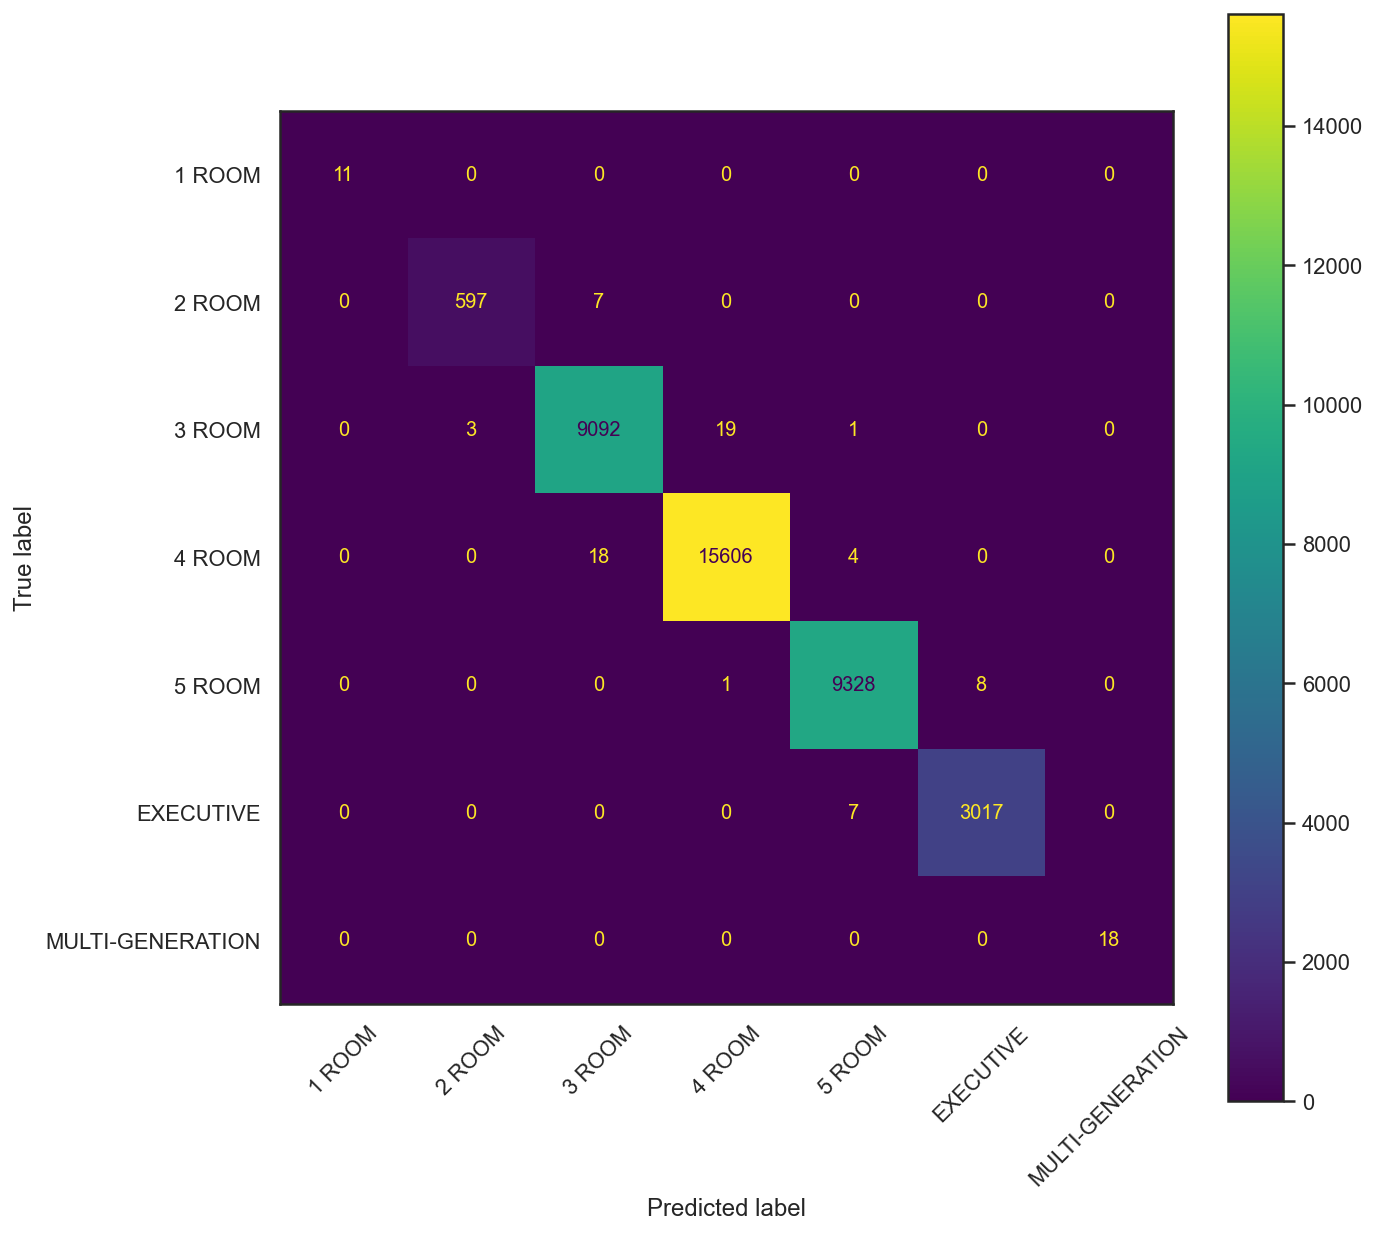

In [38]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [37]:
# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

accuracy:  0.6973527307417123
f1-Score:  0.6973527307417123
precision:  0.706428968839026
recall:  0.7104783597701378
